<a href="https://colab.research.google.com/github/bcury/Machine-Learning-Projects/blob/main/ML_Estatistica_correla%C3%A7%C3%A3o_regress%C3%A3o_LinearRegression_sele%C3%A7%C3%A3oAtributos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Correlação nada mais é do que a correpondencia entre as variaveis

regressão se baseia em modelos para criar previsões

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [6]:
#base de dados de casas
tamanho = np.array([30, 39, 49, 60]) #m²
preço = np.array([57000, 69000, 77000, 90000])

In [7]:
data = pd.DataFrame({'tamanho':tamanho, 'preço':preço})

In [5]:
data

,tamanho,preço
0,30,57000
1,39,69000
2,49,77000
3,60,90000


In [8]:
média_tamanho = data['tamanho'].mean()

In [9]:
média_tamanho

44.5

In [10]:
média_preço = data['preço'].mean()

In [11]:
média_preço

73250.0

In [14]:
desvio_padrao_tamanho = data['tamanho'].std()
desvio_padrao_preço = data['preço'].std()

In [15]:
desvio_padrao_tamanho, desvio_padrao_preço

(12.922847983320086, 13865.424623862047)

- Correlação

In [25]:
#de forma manual

In [17]:
data['diferença'] = (data['tamanho'] - média_tamanho) * (data['preço'] - média_preço)

In [18]:
data

,tamanho,preço,diferença
0,30,57000,235625.0
1,39,69000,23375.0
2,49,77000,16875.0
3,60,90000,259625.0


In [19]:
soma_diferença = data['diferença'].sum()
soma_diferença

535500.0

In [21]:
covariancia = soma_diferença / (len(data) - 1)
covariancia

178500.0

In [22]:
coeficiente_correlação = covariancia / (desvio_padrao_tamanho * desvio_padrao_preço)
coeficiente_correlação

0.9962006267707775

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


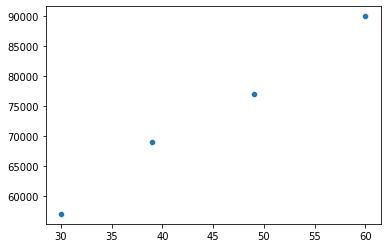

In [23]:
sns.scatterplot(tamanho, preço);

In [24]:
coeficiente_determinação = math.pow(coeficiente_correlação,2)
coeficiente_determinação

0.9924156887784898

In [26]:
#usando pandas e numpy

In [32]:
np.cov(tamanho, preço) #matriz vejamos abaixo tamanho Vs preço = covariancia
                                

array([[1.6700e+02, 1.7850e+05],
       [1.7850e+05, 1.9225e+08]])

In [33]:
data.cov() #recurso pandas

,tamanho,preço,diferença
tamanho,167.0,178500.0,1.850000e+05
preço,178500.0,192250000.0,1.612500e+08
diferença,185000.0,161250000.0,1.735512e+10


In [31]:
np.corrcoef(tamanho, preço) #coef de corerelação

array([[1.        , 0.99620063],
       [0.99620063, 1.        ]])

In [34]:
#recurso pandas
data.corr()

,tamanho,preço,diferença
tamanho,1.000000,0.996201,0.108667
preço,0.996201,1.000000,0.088278
diferença,0.108667,0.088278,1.000000


- Regressão

In [35]:
base = pd.read_csv('/content/house_prices.csv')

In [36]:
base.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [37]:
base.drop(labels= ['id','date'],axis=1, inplace=True)

In [38]:
base.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


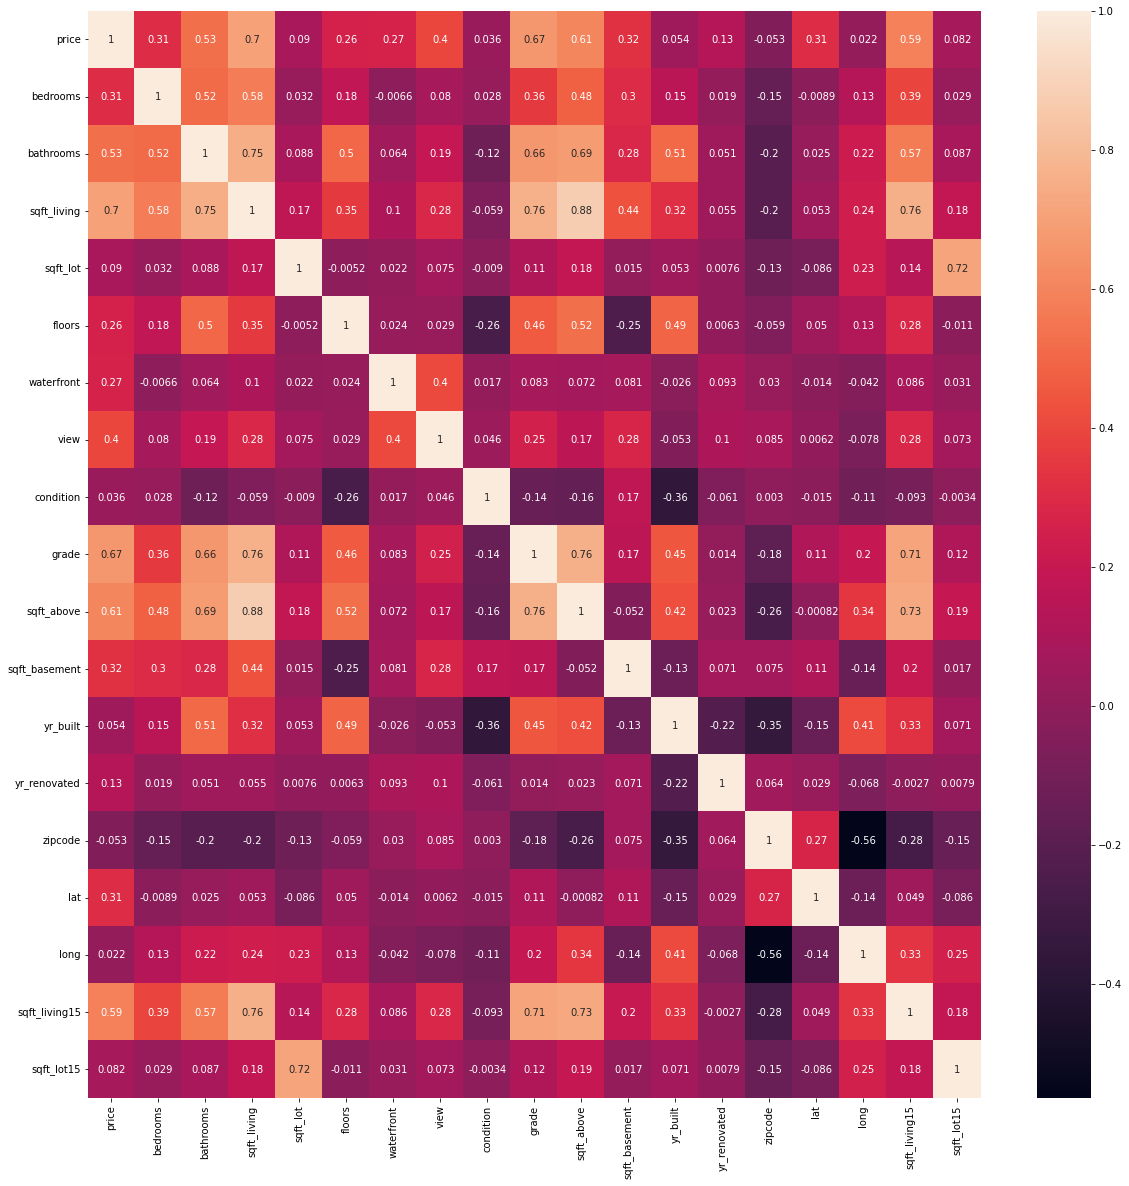

In [43]:
fig, ax = plt.subplots(figsize=(20,20))
ax = sns.heatmap(base.corr(), annot=True)


In [44]:
math.pow(0.7, 2) #0.7 valor da casa pode ser explicado pelo atributo sqft living

0.48999999999999994

**Regressão Linear**

In [45]:
x = base['sqft_living'].values
x.shape

(21613,)

In [47]:
x = x.reshape(-1,1)
x.shape

(21613, 1)

In [48]:
y = base['price'].values
y.shape

(21613,)

In [49]:
y

array([221900., 538000., 180000., ..., 402101., 400000., 325000.])

- Treinando o Modelo

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
x_treino, x_teste, y_treino, y_teste = train_test_split( x, y, test_size=0.20, random_state=1)

In [54]:
x_treino.shape, y_treino.shape

((17290, 1), (17290,))

In [55]:
x_teste.shape, y_teste.shape

((4323, 1), (4323,))

In [56]:
from sklearn.linear_model import LinearRegression

In [57]:
regressao = LinearRegression()

In [58]:
regressao.fit(x_treino, y_treino)

LinearRegression()

In [62]:
#b0
regressao.intercept_

-30186.361061054864

In [63]:
#b1
regressao.coef_

array([273.82181112])

In [67]:
regressao.intercept_ + regressao.coef_ * 500 # depnde do valor, muda o preço da casa na resposta

array([106724.5444998])

ou usando o predict , ai nap precisamos encontrar diretamete bo e b1

In [73]:
regressao.predict(np.array([[900]]))

array([216253.26894848])

ou seja, coloco o valor "900" que é da coluna "sqft_living" e o algoritimo dá a resposta do preço da casa, fazendo a previsão

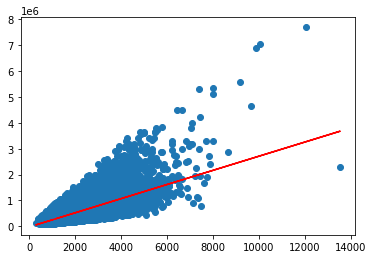

In [78]:
plt.scatter(x, y)
plt.plot(x, regressao.predict(x), color='red'); #linha da regresao

In [81]:
regressao.score(x_treino, y_treino) #r2

0.48876078213887486

In [83]:
regressao.score(x_teste,y_teste)#r2

0.5033019006466926

ou seja, o algoritimo preve os valores das casas em até 50%

a diferença de prever um valor com o de classificar um valor é que na previsão vc pode colocar o numero que quiser e ver a previsao que muitas vezes nao tem na base de dados, na classificação vc só consegue ver os resultados conforme a base de dados, o algoritimo classifica de um jeito e vc compara com o real, ja na regressao vc pode estipular um outro valor para ter a previsão

- Erros

In [84]:
previsoes = regressao.predict(x_teste)

In [85]:
previsoes, y_teste

(array([ 733776.4919685 ,  416143.19106732,  618771.33129738, ...,
         449001.80840193, 1412854.58355033,  380546.3556215 ]),
 array([ 459000.,  445000., 1057000., ...,  260000., 1795000.,  418000.]))

In [87]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [88]:
mean_absolute_error(y_teste,previsoes)

178578.01159005202

In [90]:
mean_squared_error(y_teste, previsoes) #nao é muito usada

85730574276.16481

In [91]:
math.sqrt(mean_squared_error(y_teste, previsoes))

292797.8385783693

**Regressão Linear Multipla**

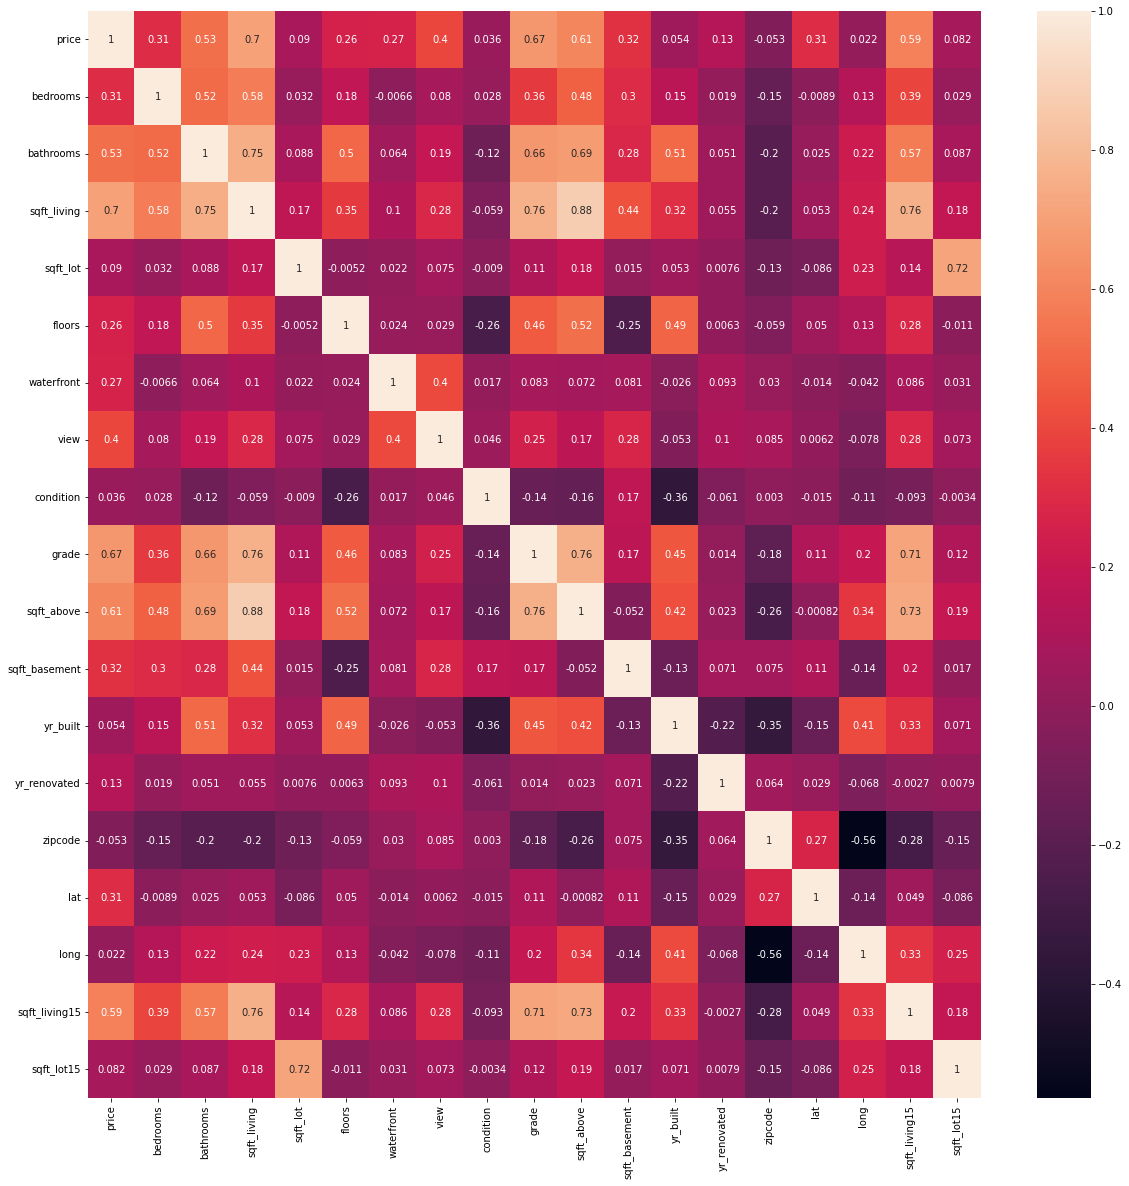

In [92]:
#novamente
fig, ax = plt.subplots(figsize=(20,20))
ax = sns.heatmap(base.corr(), annot=True)

vamo selecionar os 4 atributos com maior correlaçao com o preço para fazer a previsão

In [93]:
base.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [118]:
x = base.iloc[:,[2,3,9,10]].values
x

array([[1.00e+00, 1.18e+03, 7.00e+00, 1.18e+03],
       [2.25e+00, 2.57e+03, 7.00e+00, 2.17e+03],
       [1.00e+00, 7.70e+02, 6.00e+00, 7.70e+02],
       ...,
       [7.50e-01, 1.02e+03, 7.00e+00, 1.02e+03],
       [2.50e+00, 1.60e+03, 8.00e+00, 1.60e+03],
       [7.50e-01, 1.02e+03, 7.00e+00, 1.02e+03]])

In [119]:
y = base.iloc[:,0].values
y

array([221900., 538000., 180000., ..., 402101., 400000., 325000.])

In [96]:
from sklearn.model_selection import train_test_split

In [97]:
x_treino, x_teste, y_treino, y_teste = train_test_split( x, y, test_size=0.20, random_state=1)

In [98]:
x_treino.shape

(17290, 4)

In [99]:
y_treino.shape

(17290,)

In [101]:
x_teste.shape

(4323, 4)

In [102]:
y_teste.shape

(4323,)

In [103]:
from sklearn.linear_model import LinearRegression

In [104]:
regressor = LinearRegression()

In [105]:
regressor.fit(x_treino, y_treino)

LinearRegression()

In [106]:
regressor.score(x_treino,y_treino)

0.5429158715490658

In [107]:
regressor.score(x_teste,y_teste)

0.5433655885394335

In [108]:
previsor = regressor.predict(x_teste)

In [109]:
mean_absolute_error(y_teste, previsor)

163331.28566448082

para melhorarmos vamos usar uma tecnica: normalizar a distribuição

In [120]:
y = np.log(y)
y

array([12.30998211, 13.19561384, 12.10071213, ..., 12.90445858,
       12.89921983, 12.69158046])

In [121]:
x_treino, x_teste, y_treino, y_teste = train_test_split( x, y, test_size=0.20, random_state=1)

In [122]:
from sklearn.linear_model import LinearRegression

In [123]:
regression = LinearRegression()

In [124]:
regression.fit(x_treino,y_treino)

LinearRegression()

In [125]:
regression.score(x_treino,y_treino)

0.559462085496587

In [126]:
regression.score(x_teste,y_teste)

0.583736323335128

melhoramos a acurácia 

**Seleção de atributos**

In [138]:
from sklearn.feature_selection import SelectFdr, f_regression

In [141]:
selecao = SelectFdr(f_regression, alpha=0.0)

In [146]:
selecao.pvalues_

array([0., 0., 0., 0.])

In [153]:
x_novo = selecao.fit_transform(x,y)

In [144]:
x.shape, y.shape

((21613, 4), (21613,))

In [145]:
colunas = selecao.get_support()

In [132]:
colunas

array([ True,  True,  True,  True])

In [133]:
base.columns[1:17]

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long'],
      dtype='object')

In [ ]:
base.columns[1:17][colunas == True]

In [154]:
x_treino, x_teste, y_treino, y_teste = train_test_split( x_novo, y, test_size=0.20, random_state=1)

In [155]:
regression.fit(x_treino, y_treino)

LinearRegression()

In [ ]:
regression.score(x_treino, y_treino) #0.66

In [ ]:
regression.score(x_teste, y_teste) #0.64

melhoramos mais ainda o algoritimo